# Prime Number Finder
this program finds all the prime numbers in a range of numbers
runs with multiprocessing, can change the number of processes to speed up the program
it uses multiprocessing and a timer, Basic goal is a benchmark, may add data visualization
more cores does not always mean faster

In [1]:
import multiprocessing
import math
import time
import os

counter_ceiling = 1000
process_nummber = 1
test_length = 10

chunk_count = process_nummber
chunk_size = counter_ceiling / chunk_count
chunks = [(i, i + chunk_size) for i in range(0, int(counter_ceiling), int(chunk_size))]
total_primes = 0
counter = 0
average_time = 0
times = []
bench_times = []

def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def find_number_of_primes(start, end):
    return sum(1 for i in range(int(start), int(end)) if is_prime(i)) # adds 1 to the sum for every prime number in the range

def pool_method(): # i think this is working as intended
    global total_primes, counter

    results = []

    with multiprocessing.Pool(processes=process_nummber) as pool:
        for i in range(process_nummber):
            results.append(pool.apply_async(find_number_of_primes, args=(chunks[i]))) # adds the result of the function to the list
            if counter == 0:
                for result in results:
                    total_primes += result.get()
                counter += 1
            else: # you have to run result.get everytime
                for result in results:
                    result.get()

def get_average(number_of_times=test_length):
    global average_time,times
    total_time = 0


    for i in range(number_of_times):
        #os.system('cls' if os.name == 'nt' else 'clear')
        print(f"Run {i+1} / {number_of_times}   ", end='')

        start_time = time.time()
        pool_method()
        end_time = time.time()
        run_time = (end_time - start_time)
        temp = (i,run_time)
        times.append(temp)
        bench_times.append(dict(i,temp))
        total_time += run_time

        print(round(end_time - start_time,3), 'seconds')

    average_time = total_time / number_of_times

def run_bench(number_of_times=test_length, total_pocesses=12):
    for i in range(1,total_pocesses,2):
        get_average(number_of_times)





if __name__ == '__main__':

    start_global_time = time.time()
    get_average()
    end__global_time = time.time()

    print("numbers searched: ", counter_ceiling)
    print("primes found: ", total_primes)
    print("cpu count: ", os.cpu_count())
    print("processes: ", process_nummber)
    print(f"Average time taken: {round(average_time, 3)} seconds")
    print('total elapsed time: ',round(end__global_time - start_global_time, 3), 'seconds')
    # creates a list of tuples with the time taken for each run

Run 1 / 100   0.056 seconds
Run 2 / 100   0.007 seconds
Run 3 / 100   0.008 seconds
Run 4 / 100   0.015 seconds
Run 5 / 100   0.008 seconds
Run 6 / 100   0.017 seconds
Run 7 / 100   0.01 seconds
Run 8 / 100   0.013 seconds
Run 9 / 100   0.008 seconds
Run 10 / 100   0.009 seconds
Run 11 / 100   0.009 seconds
Run 12 / 100   0.014 seconds
Run 13 / 100   0.009 seconds
Run 14 / 100   0.01 seconds
Run 15 / 100   0.008 seconds
Run 16 / 100   0.008 seconds
Run 17 / 100   0.009 seconds
Run 18 / 100   0.007 seconds
Run 19 / 100   0.014 seconds
Run 20 / 100   0.014 seconds
Run 21 / 100   0.009 seconds
Run 22 / 100   0.009 seconds
Run 23 / 100   0.008 seconds
Run 24 / 100   0.008 seconds
Run 25 / 100   0.023 seconds
Run 26 / 100   0.008 seconds
Run 27 / 100   0.008 seconds
Run 28 / 100   0.009 seconds
Run 29 / 100   0.008 seconds
Run 30 / 100   0.018 seconds
Run 31 / 100   0.007 seconds
Run 32 / 100   0.008 seconds
Run 33 / 100   0.012 seconds
Run 34 / 100   0.014 seconds
Run 35 / 100   0.009 seco

## Down here is where i will plot this data and make it look nice

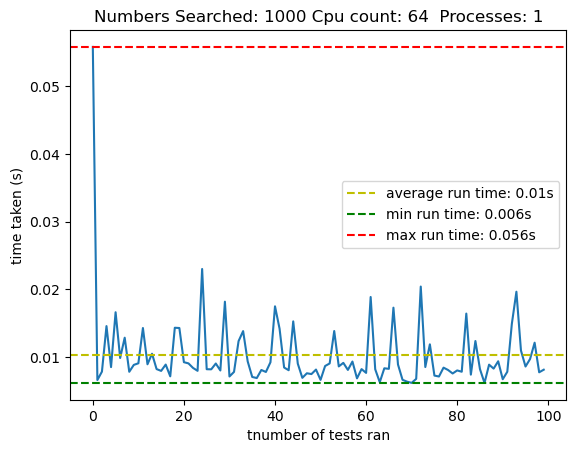

In [5]:
import matplotlib.pyplot as plt

x = [i[0] for i in times]
y = [i[1] for i in times]
min_time = min(y)
max_time = max(y)

# labels
plt.xlabel('tnumber of tests ran')
plt.ylabel('time taken (s)')
plt.title("Numbers Searched: "+str(counter_ceiling) +" Cpu count: "+str(os.cpu_count())+"  Processes: "+str(process_nummber))

plt.plot(x,y)
plt.axhline(y=average_time, color='y', linestyle='--', label="average run time: "+str(round(average_time,3))+"s")
plt.axhline(y=min_time, color='g', linestyle='--', label="min run time: "+str(round(min_time,3))+"s")
plt.axhline(y=max_time, color='r', linestyle='--', label="max run time: "+str(round(max_time,3))+"s")
plt.legend()
plt.show()
